In [1]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps.zip \
    -O /tmp/rps.zip
  
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-test-set.zip \
    -O /tmp/rps-test-set.zip

--2021-03-22 10:45:29--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.203.128, 64.233.189.128, 108.177.97.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.203.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 200682221 (191M) [application/zip]
Saving to: ‘/tmp/rps.zip’

/tmp/rps.zip        100%[===================>] 191.38M   179MB/s    in 1.1s    

2021-03-22 10:45:30 (179 MB/s) - ‘/tmp/rps.zip’ saved [200682221/200682221]

--2021-03-22 10:45:30--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-test-set.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.189.128, 108.177.97.128, 74.125.203.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.189.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29516758 (28M) [application/zip]
Saving to: ‘/tmp

In [2]:
##IMPORTS
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator
import os
import zipfile
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense
from tensorflow.keras.models import Sequential

In [3]:

local_zip = '/tmp/rps.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/')
zip_ref.close()

local_zip = '/tmp/rps-test-set.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/')
zip_ref.close()

In [4]:
rock_dir = os.path.join('/tmp/rps/rock')
paper_dir = os.path.join('/tmp/rps/paper')
scissors_dir = os.path.join('/tmp/rps/scissors')

print('total training rock images:', len(os.listdir(rock_dir)))
print('total training paper images:', len(os.listdir(paper_dir)))
print('total training scissors images:', len(os.listdir(scissors_dir)))

rock_files = os.listdir(rock_dir)
print(rock_files[:10])

paper_files = os.listdir(paper_dir)
print(paper_files[:10])

scissors_files = os.listdir(scissors_dir)
print(scissors_files[:10])

total training rock images: 840
total training paper images: 840
total training scissors images: 840
['rock05ck01-010.png', 'rock07-k03-109.png', 'rock06ck02-023.png', 'rock05ck01-018.png', 'rock04-093.png', 'rock07-k03-119.png', 'rock04-051.png', 'rock05ck01-112.png', 'rock01-056.png', 'rock03-093.png']
['paper07-077.png', 'paper01-029.png', 'paper05-100.png', 'paper02-101.png', 'paper01-005.png', 'paper02-081.png', 'paper04-028.png', 'paper07-068.png', 'paper05-023.png', 'paper01-034.png']
['scissors01-037.png', 'scissors01-023.png', 'testscissors01-035.png', 'testscissors02-000.png', 'testscissors01-002.png', 'testscissors03-054.png', 'scissors01-086.png', 'testscissors02-049.png', 'testscissors03-078.png', 'testscissors02-038.png']


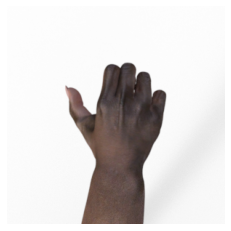

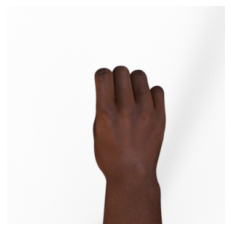

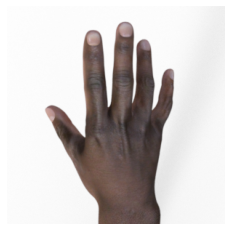

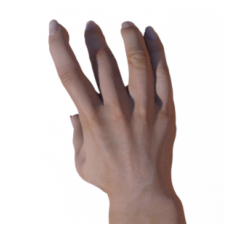

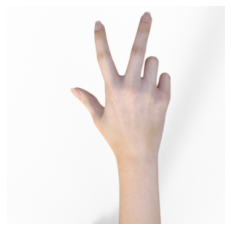

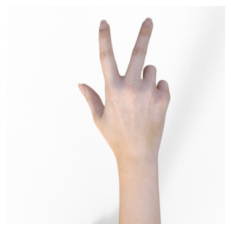

In [5]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

pic_index = 2

next_rock = [os.path.join(rock_dir, fname) 
                for fname in rock_files[pic_index-2:pic_index]]
next_paper = [os.path.join(paper_dir, fname) 
                for fname in paper_files[pic_index-2:pic_index]]
next_scissors = [os.path.join(scissors_dir, fname) 
                for fname in scissors_files[pic_index-2:pic_index]]

for i, img_path in enumerate(next_rock+next_paper+next_scissors):
  #print(img_path)
  img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.axis('Off')
  plt.show()

In [6]:
##IMAGE DATA GENERATORS
TRAINING_DIR = "/tmp/rps/"
VALIDATION_DIR="/tmp/rps-test-set/"

training_datagen=ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

validation_datagen=ImageDataGenerator(rescale=1./255)



train_generator=training_datagen.flow_from_directory(
  TRAINING_DIR,
	target_size=(150,150),
	class_mode='categorical',
  batch_size=126
    
)

validation_generator = validation_datagen.flow_from_directory(
	VALIDATION_DIR,
	target_size=(150,150),
	class_mode='categorical',
  batch_size=126
)




Found 2520 images belonging to 3 classes.
Found 372 images belonging to 3 classes.


In [7]:
###MODEL#########


model=tf.keras.models.Sequential([
                                  Conv2D(64,(3,3),activation='relu',input_shape=(150,150,3)),
                                  MaxPooling2D(2,2),
                                  
                                  Conv2D(64,(3,3),activation='relu'),
                                  MaxPooling2D(2,2),
                                  
                                  Conv2D(128,(3,3),activation='relu'),
                                  MaxPooling2D(2,2),
                                  
                                  Conv2D(128,(3,3),activation='relu'),
                                  MaxPooling2D(2,2),

                                  Flatten(),
                                  tf.keras.layers.Dropout(0.5),
                                  
                                  Dense(512,activation='relu'),
                                  Dense(3,activation='softmax')])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [8]:

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self,epoch,logs={}):
    if(logs.get('accuracy')>0.8):
      print("\n thats enough!!")
      self.model.stop_training=True

callbacks=myCallback()

In [9]:
model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

history = model.fit(train_generator, epochs=25, steps_per_epoch=20, validation_data = validation_generator, verbose = 1, validation_steps=3)

model.save("rps.h5")

Epoch 1/25
20/20 [==============================] - 162s 8s/step - loss: 1.3942 - accuracy: 0.3438 - val_loss: 1.0958 - val_accuracy: 0.3763
Epoch 2/25
20/20 [==============================] - 160s 8s/step - loss: 1.1092 - accuracy: 0.3906 - val_loss: 1.0688 - val_accuracy: 0.3414
Epoch 3/25
20/20 [==============================] - 159s 8s/step - loss: 1.0745 - accuracy: 0.4267 - val_loss: 0.9650 - val_accuracy: 0.4677
Epoch 4/25
20/20 [==============================] - 164s 8s/step - loss: 1.1018 - accuracy: 0.5160 - val_loss: 0.6204 - val_accuracy: 0.6989
Epoch 5/25
20/20 [==============================] - 158s 8s/step - loss: 0.7490 - accuracy: 0.6501 - val_loss: 0.3360 - val_accuracy: 0.8065
Epoch 6/25
20/20 [==============================] - 158s 8s/step - loss: 0.8393 - accuracy: 0.6712 - val_loss: 0.6989 - val_accuracy: 0.6667
Epoch 7/25
20/20 [==============================] - 158s 8s/step - loss: 0.6381 - accuracy: 0.7122 - val_loss: 0.2054 - val_accuracy: 0.9382
Epoch 8/25
20

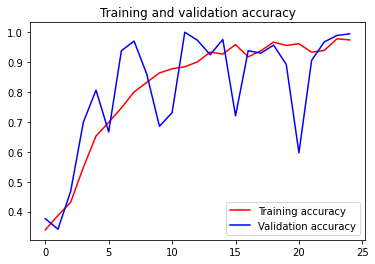

<Figure size 432x288 with 0 Axes>

In [10]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

In [ ]:
##SWpecific to colab
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150, 150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(fn)
  print(classes)